In [1]:
# Install Tesseract OCR
!sudo apt install -y tesseract-ocr
!pip install pytesseract transformers torch Pillow


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (3,911 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

<ipython-input-2-d00687761c4f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette="viridis")


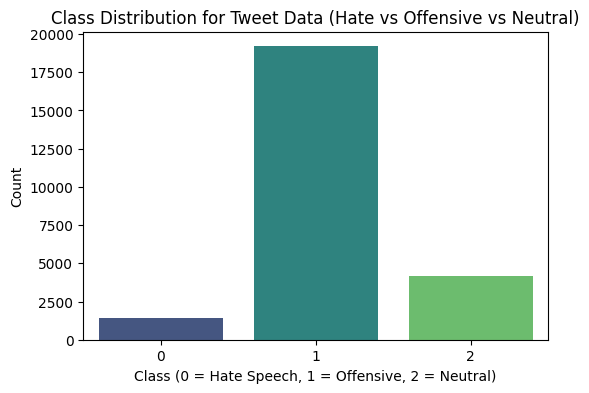

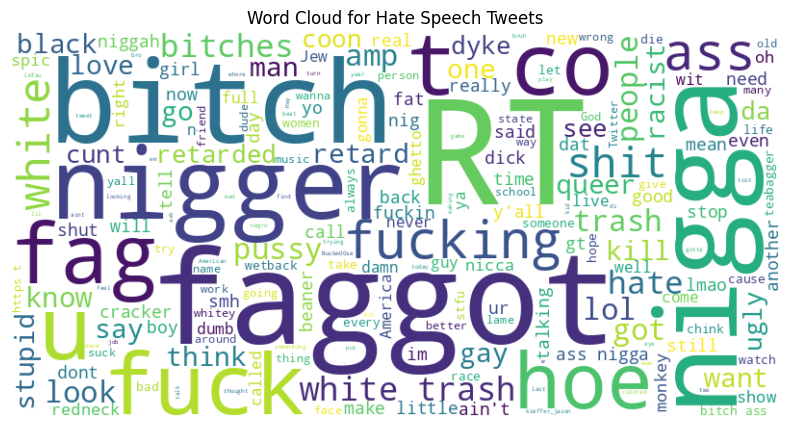

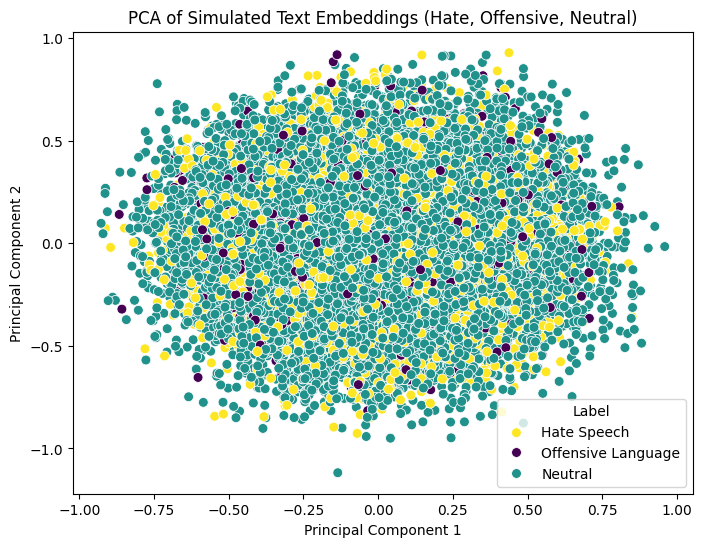

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.decomposition import PCA

file_path = '/content/twitter_data.csv'
df = pd.read_csv(file_path)

df = df.rename(columns={"class": "label", "tweet": "text"})

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette="viridis")
plt.title('Class Distribution for Tweet Data (Hate vs Offensive vs Neutral)')
plt.xlabel('Class (0 = Hate Speech, 1 = Offensive, 2 = Neutral)')
plt.ylabel('Count')
plt.show()

hate_speech_text = " ".join(df[df['label'] == 0]['text'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(hate_speech_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Hate Speech Tweets")
plt.show()
np.random.seed(42)
embeddings_text = np.random.rand(len(df), 10)
pca_text = PCA(n_components=2)
reduced_text_embeddings = pca_text.fit_transform(embeddings_text)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=reduced_text_embeddings[:, 0], y=reduced_text_embeddings[:, 1], hue=df['label'], palette="viridis", s=50)
plt.title("PCA of Simulated Text Embeddings (Hate, Offensive, Neutral)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Label', loc='best', labels=['Hate Speech', 'Offensive Language', 'Neutral'])
plt.show()

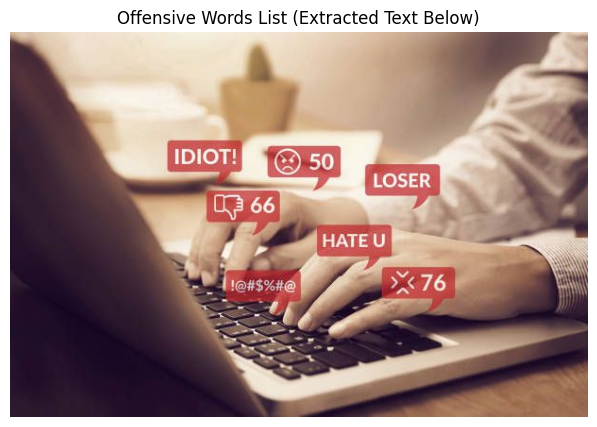

Extracted Text from Offensive Words Image:
  



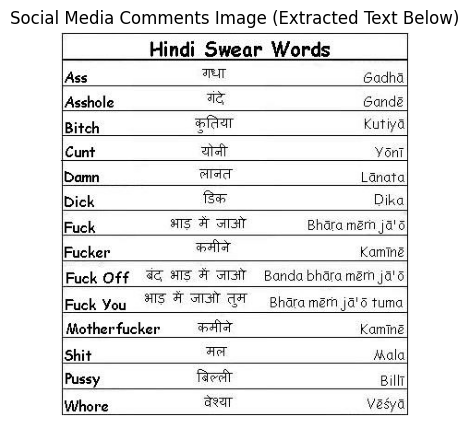

Extracted Text from Social Media Comments Image:
  

Hindi Swear Words

 

 

 

 

 

 

 

 

Ass aT 6adha
[Asshole ate, Ganda
Bitch pfs Kutiya
Cunt ater Yyont
[Damn ‘eel Lanata|
Dick ae Dika
Fuck ans 4 ari Bhara math ja'o|
Fucker waiter Kaming

 

Fuck Off 9@ 41S # STG Banda bhara marh ja’
Fuck You" # Sat UF

 

Bhara men ja's tuma

 

 

 

Motherfucker patter kaminé
Shit estate Adala
Pussy aah Billi

 

 

 

Whore oem vesya|

 



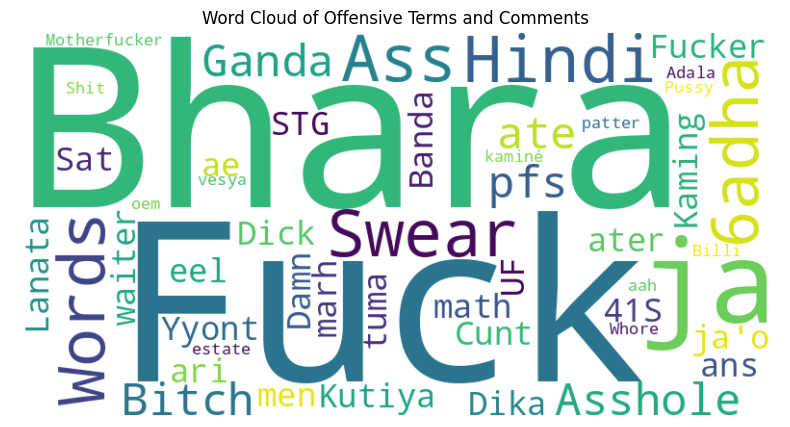

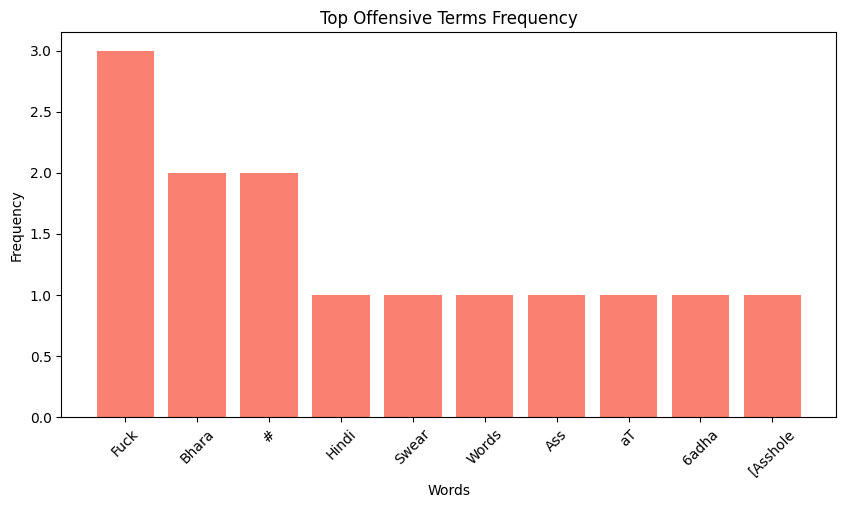

In [3]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import cv2
import numpy as np
from collections import Counter

image_text_terms = Image.open('/content/WhatsApp Image 2024-11-02 at 18.55.00.jpeg')
image_social_media_comments = Image.open('/content/eea275c4c50254a054e176821d09a436.jpg')

def extract_text(image):
    return pytesseract.image_to_string(image, lang="eng+hin")

text_from_terms_image = extract_text(image_text_terms)
text_from_social_media_image = extract_text(image_social_media_comments)

combined_text = text_from_terms_image + " " + text_from_social_media_image

def create_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title("Word Cloud of Offensive Terms and Comments")
    plt.show()

def create_bar_chart(text, num_words=10):
    words = text.split()
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(num_words)
    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 5))
    plt.bar(words, counts, color='salmon')
    plt.xticks(rotation=45)
    plt.title("Top Offensive Terms Frequency")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.show()

def display_images_with_text():

    plt.figure(figsize=(10, 5))
    plt.imshow(image_text_terms)
    plt.axis("off")
    plt.title("Offensive Words List (Extracted Text Below)")
    plt.show()
    print("Extracted Text from Offensive Words Image:\n", text_from_terms_image)

    plt.figure(figsize=(10, 5))
    plt.imshow(image_social_media_comments)
    plt.axis("off")
    plt.title("Social Media Comments Image (Extracted Text Below)")
    plt.show()
    print("Extracted Text from Social Media Comments Image:\n", text_from_social_media_image)

# Run visualizations
display_images_with_text()
create_word_cloud(combined_text)
create_bar_chart(combined_text)